# Microsoft Movie Studio

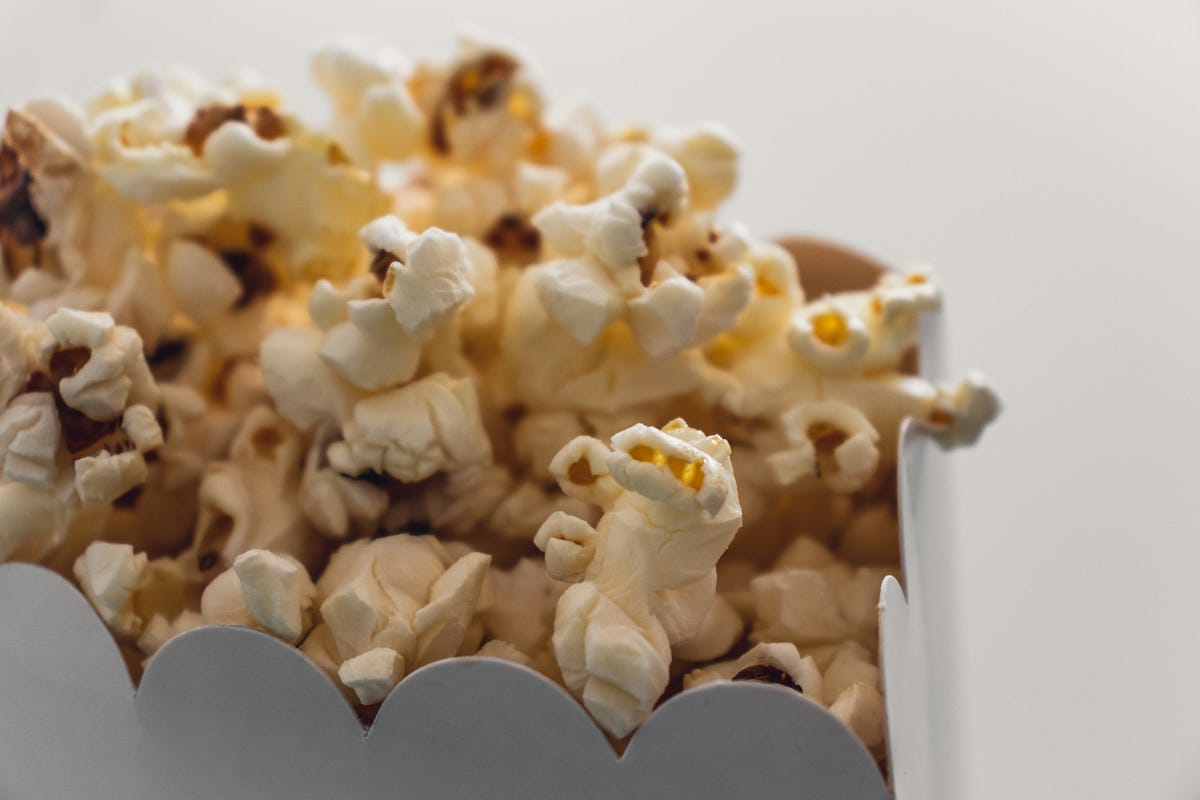

## Overview

For this project, we are using exploratory data analysis to generate insights from different sources and past movies data for a business stakeholder.

## Business Problem

Microsoft has decided to create a new movie studio, is requesting recommendations for their product. We are tasked with exploring data on the market and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data

To answer the business questions, we utilized various data sets including the IMBD Database and then selected the following that have relevant factors such as ratings and genres of past movies to guide our insights and recommendations. 

In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [9]:
#Loading in data from imdb file
conn = sqlite3.connect('Data/im.db')


sql_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""
pd.read_sql(sql_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [10]:
basics_df = pd.read_sql("""
SELECT *
FROM movie_basics

""", conn)
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
# previous cell shows a few nulls in original_title, several more in
# runtime_minutes and genras, I will potentially drop those


# two columns have numerical data, runtime_mines and start_year

# the range for start_year is from 2010 to 2115, which can mean incorrect 
# data or future releases
basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [12]:
# Further exploration confirm that there are entries for future years and might not be relevant for this analysis
# we can also see that the majority of entries are from earlier years

# we will be looking at data from 2010 to 2022 to get more accurate results

basics_df.groupby('start_year').count()

,movie_id,primary_title,original_title,runtime_minutes,genres
start_year,,,,,
2010,11849,11849,11849,9986,11452
2011,12900,12900,12900,10707,12432
2012,13787,13787,13786,11405,13356
2013,14709,14709,14708,12308,14298
2014,15589,15589,15589,12964,15095
2015,16243,16243,16242,13252,15569
2016,17272,17272,17269,13514,16353
2017,17504,17504,17494,13466,16816
2018,16849,16849,16846,12213,16293


In [13]:
# Exploring the movie_ratings table from the sql data, there are no nulls in this table
ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings

""", conn)
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
# removing significant figures
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# The mean rating is 6.3 and it looks like there are no incorrect entries
# the numvotes column looks like it has an outlier


ratings_df.describe()

,averagerating,numvotes
count,73856.00000,73856.00000
mean,6.33273,3523.66217
std,1.47498,30294.02297
min,1.00000,5.00000
25%,5.50000,14.00000
50%,6.50000,49.00000
75%,7.40000,282.00000
max,10.00000,1841066.00000


### Data Preparation and Cleaning

We joined the movie_basics table that contains movie_id and genres and the movie_ratings table to analyze which genres were the most popular.

In [15]:
genres_ratings_df = pd.read_sql("""

SELECT mb.movie_id AS Movie_ID, mb.primary_title AS Title, mb.start_year AS Year, mb.genres AS Genre, mr.averagerating AS Rating, mr.numvotes AS Votes
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id

""", conn)

In [16]:
genres_ratings_df

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00000,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20000,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90000,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10000,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50000,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,Documentary,6.20000,6
73852,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.70000,136
73853,tt9914642,Albatross,2017,Documentary,8.50000,8
73854,tt9914942,La vida sense la Sara Amat,2019,None,6.60000,5


In [17]:
# after join, since we didn't add the runtime column, there are only nulls in the Genre column
# there are now 73856 entries, as we merged on movie_id, the entries without id were not added

genres_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_ID  73856 non-null  object 
 1   Title     73856 non-null  object 
 2   Year      73856 non-null  int64  
 3   Genre     73052 non-null  object 
 4   Rating    73856 non-null  float64
 5   Votes     73856 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ MB


In [18]:
genres_ratings_df.isna().sum()

Movie_ID      0
Title         0
Year          0
Genre       804
Rating        0
Votes         0
dtype: int64

In [19]:
# dropping nulls in genre column
# total number of rows is now 73052

genres_ratings_df = genres_ratings_df.dropna(subset=['Genre'])

genres_ratings_df

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00000,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20000,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90000,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10000,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50000,119
...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,Documentary,6.20000,5
73851,tt9913084,Diabolik sono io,2019,Documentary,6.20000,6
73852,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.70000,136
73853,tt9914642,Albatross,2017,Documentary,8.50000,8


In [20]:
# after merge and removing nulls, the year range is from 2010-2019

genres_ratings_df.groupby('Year').count()

,Movie_ID,Title,Genre,Rating,Votes
Year,,,,,
2010,6701,6701,6701,6701,6701
2011,7274,7274,7274,7274,7274
2012,7602,7602,7602,7602,7602
2013,7905,7905,7905,7905,7905
2014,8269,8269,8269,8269,8269
2015,8405,8405,8405,8405,8405
2016,8613,8613,8613,8613,8613
2017,8638,8638,8638,8638,8638
2018,7476,7476,7476,7476,7476


In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


genres_ratings_df.describe()

,Year,Rating,Votes
count,73052.00000,73052.00000,73052.00000
mean,2014.28143,6.33093,3562.17263
std,2.61529,1.47470,30458.03757
min,2010.00000,1.00000,5.00000
25%,2012.00000,5.50000,14.00000
50%,2014.00000,6.50000,50.00000
75%,2017.00000,7.40000,289.00000
max,2019.00000,10.00000,1841066.00000


In [22]:
# there are no duplicate movie ids but possible duplicate names

genres_ratings_df.describe(include='object')

,Movie_ID,Title,Genre
count,73052,73052,73052
unique,73052,69248,923
top,tt2081329,The Return,Drama
freq,1,11,11612


In [23]:
# creating new column for movies with multiple genres into a list 
# then we can use .explode() to break them 

genres_ratings_df['Genre'] = genres_ratings_df['Genre'].str.split(',')

<ipython-input-23-893b25ecdf7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_ratings_df['Genre'] = genres_ratings_df['Genre'].str.split(',')


In [24]:
genres_ratings_df

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.00000,77
1,tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]",7.20000,43
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.90000,4517
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.10000,13
4,tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]",6.50000,119
...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,[Documentary],6.20000,5
73851,tt9913084,Diabolik sono io,2019,[Documentary],6.20000,6
73852,tt9914286,Sokagin Çocuklari,2019,"[Drama, Family]",8.70000,136
73853,tt9914642,Albatross,2017,[Documentary],8.50000,8


In [25]:
# creating new column with first genre
genres_ratings_df['Genres1'] = genres_ratings_df['Genre'].apply(lambda x: x[0])
genres_ratings_df

<ipython-input-25-94f131fd23cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_ratings_df['Genres1'] = genres_ratings_df['Genre'].apply(lambda x: x[0])


,Movie_ID,Title,Year,Genre,Rating,Votes,Genres1
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.00000,77,Action
1,tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]",7.20000,43,Biography
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.90000,4517,Drama
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.10000,13,Comedy
4,tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]",6.50000,119,Comedy
...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,[Documentary],6.20000,5,Documentary
73851,tt9913084,Diabolik sono io,2019,[Documentary],6.20000,6,Documentary
73852,tt9914286,Sokagin Çocuklari,2019,"[Drama, Family]",8.70000,136,Drama
73853,tt9914642,Albatross,2017,[Documentary],8.50000,8,Documentary


In [26]:
# converting 'Year' to str so it won't show in aggregate
genres_ratings_df['Year'] = genres_ratings_df['Year'].astype(str)

<ipython-input-26-86edcb3022ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_ratings_df['Year'] = genres_ratings_df['Year'].astype(str)


In [27]:
avg_rating_genre = genres_ratings_df.groupby('Genres1').mean().sort_values(by='Rating', ascending=False)
avg_rating_genre

,Rating,Votes
Genres1,,
Game-Show,9.00000,7.00000
Music,7.50677,222.56771
Documentary,7.31660,213.03538
Biography,7.17451,5185.68424
Sport,6.94494,59.12360
Musical,6.63725,141.58824
History,6.41324,94.49265
Adventure,6.38671,10419.62519
Drama,6.37056,2198.86017


In [28]:
# num of movies per genre
movies_per_genre = genres_ratings_df.groupby('Genres1')['Movie_ID'].count()
avg_rating_genre['movies_per_genre'] = movies_per_genre
avg_rating_genre

,Rating,Votes,movies_per_genre
Genres1,,,
Game-Show,9.00000,7.00000,1
Music,7.50677,222.56771,192
Documentary,7.31660,213.03538,13962
Biography,7.17451,5185.68424,3433
Sport,6.94494,59.12360,89
Musical,6.63725,141.58824,153
History,6.41324,94.49265,136
Adventure,6.38671,10419.62519,2596
Drama,6.37056,2198.86017,18572


## Results

In [29]:
# filtering out genres with less than 1000 movies
# this list is the top rated genres with more than 1000 movies

avg_rating_genre2 = avg_rating_genre.loc[avg_rating_genre['movies_per_genre'] > 1000].sort_values(by='Rating', ascending=False)
avg_rating_genre2

,Rating,Votes,movies_per_genre
Genres1,,,
Documentary,7.31660,213.03538,13962
Biography,7.17451,5185.68424,3433
Adventure,6.38671,10419.62519,2596
Drama,6.37056,2198.86017,18572
Crime,6.15910,5287.37330,2494
Comedy,5.99851,2733.42078,14649
Action,5.81036,14476.48569,6988
Thriller,5.70781,294.95713,1563
Horror,4.85697,2368.81559,4490


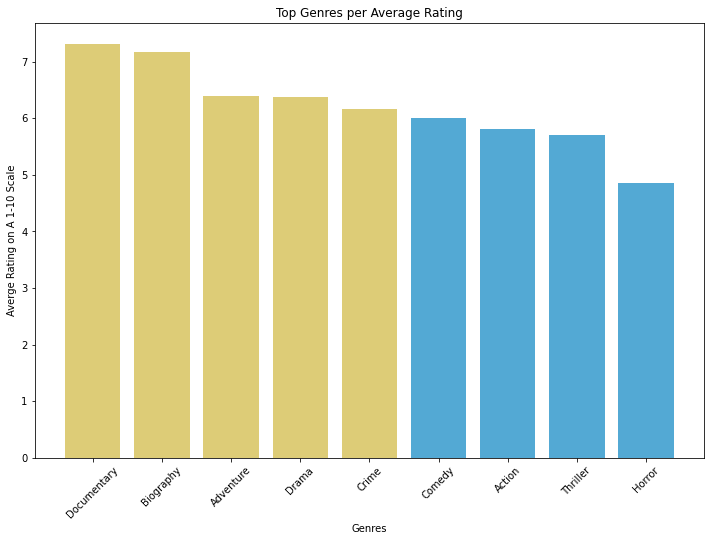

In [32]:
figure, ax = plt.subplots(figsize=(12, 8))

color = ['#DDCC77','#DDCC77','#DDCC77','#DDCC77','#DDCC77', '#53A9D4','#53A9D4','#53A9D4','#53A9D4']
# color palates for color blindness:
# https://davidmathlogic.com/colorblind/#%23332288-%23117733-%235FA599-%233EA6DA-%23DDCC77-%23CC6677-%23AA4499-%23882255

ax.bar(x = avg_rating_genre2.index , height = avg_rating_genre2['Rating'],
                                       color = color )
ax.set_title('Top Genres per Average Rating')
ax.set_xlabel('Genres')
ax.set_ylabel('Averge Rating on A 1-10 Scale')
plt.xticks(rotation = 45 )

plt.savefig('Images/top_genres.png', dpi=300);


## Conclusion And Recommendations

Based on the information in the data sets, we can see the highest rated genres are Documentary, Biography, Adventure, Drama, Crime, Comedy, Action, Thriller and Horror.
We recommend venturing into those fields as we explore what types of movies to make at Microsof's new studio.

## Next Steps

This dataset looks at movie information from 20010-2019. As seen on the graph, some genres that have been popular in the last few years such as **Action** and **Comedy** are on the lower end of the spectrum and is worth considering other measures in addition to genre to determine not just volume, but the profits involved in those genres. Profit, ROI or gross were not included in this dataset.
​


In [ ]:
genres_ratings_df

In [ ]:
genres

In [ ]:
transpose.groupby